https://www.kaggle.com/code/meenaaa/cancer-death-rate-xgboost/notebook

https://www.researchgate.net/publication/341042405_On_linear_regression_models_with_hierarchical_categorical_variables

In [1]:
# data wrangling tools
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# statistical analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# scikit-learn
from sklearn.model_selection import train_test_split

import time

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
trainset = pd.read_csv("G:/My Drive/DataMining/POC/LungCancer/Dataset/Transform/trainset.csv", index_col = 0)
trainset.head(5)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,City,State,Region,Division,TARGET_deathRate
Geography,,,,,,,,,,,,,,,,,,,,,
"Greene County, North Carolina",0.083439,0.122371,0.291870,0.133236,0.846543,0.0,0.5344,0,0.494915,0.592934,...,0.055978,1.000000,0.478172,0.891040,0.407456,603,33,2,6,0.648195
"McHenry County, Illinois",1.000000,1.000000,1.000000,1.000000,0.124789,0.0,0.5440,8,0.535593,0.549923,...,0.982636,0.522842,0.886624,0.457204,0.401518,948,13,0,0,0.739132
"Wichita County, Kansas",1.000000,0.009178,0.614898,0.008714,0.279933,0.0,0.4288,6,0.410169,0.559140,...,0.118496,0.574822,0.788191,0.753252,0.388981,1614,16,0,7,0.682701
"Mineral County, Montana",0.024442,0.027533,0.275623,0.022454,0.475548,0.0,1.0000,0,1.000000,0.872504,...,0.061625,0.028026,0.543234,0.355567,0.425932,984,26,3,3,0.913427
"Ohio County, West Virginia",0.254530,0.367113,0.350392,0.277148,0.512648,1.0,0.6720,1,0.640678,0.700461,...,0.317203,0.057158,0.455453,0.347449,0.411415,1085,48,2,6,0.810853


In [4]:
valset = pd.read_csv("G:/My Drive/DataMining/POC/LungCancer/Dataset/Transform/valset.csv", index_col = 0)
valset.head(5)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate,City,State,Region,Division
Geography,,,,,,,,,,,,,,,,,,,,,
"Linn County, Oregon",0.563843,0.826004,0.433484,0.785557,0.536256,0.039546,0.5504,3,0.555932,0.556068,...,0.456603,0.244924,0.658341,0.496995,0.418344,0.747251,139,32,3,5
"Champaign County, Illinois",0.653182,0.807648,0.505499,1.108948,0.654300,0.961857,0.2240,4,0.196610,0.258065,...,0.980500,0.193658,0.382380,0.369846,0.306170,0.673636,40,8,0,0
"Saratoga County, New York",0.933418,1.073805,0.982915,1.108948,0.134907,0.126423,0.6240,8,0.627119,0.632873,...,0.885327,0.077846,0.680359,0.482247,0.377763,0.831963,228,27,1,2
"Montmorency County, Michigan",0.069111,0.104015,0.305802,0.055315,0.421585,0.000000,0.9616,1,0.959322,0.987711,...,0.000000,0.067381,0.599090,0.348074,0.487958,0.766196,172,17,0,0
"Barrow County, Georgia",0.231774,0.339579,0.540069,0.489118,0.330523,0.000000,0.4000,5,0.355932,0.427035,...,0.980500,0.391169,0.735752,0.567292,0.436490,0.693934,8,6,2,6


In [5]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2467 entries, Greene County, North Carolina to Van Wert County, Ohio
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2467 non-null   float64
 1   avgDeathsPerYear         2467 non-null   float64
 2   incidenceRate            2467 non-null   float64
 3   medIncome                2467 non-null   float64
 4   popEst2015               2467 non-null   float64
 5   povertyPercent           2467 non-null   float64
 6   studyPerCap              2467 non-null   float64
 7   binnedInc                2467 non-null   int64  
 8   MedianAge                2467 non-null   float64
 9   MedianAgeMale            2467 non-null   float64
 10  MedianAgeFemale          2467 non-null   float64
 11  AvgHouseholdSize         2467 non-null   float64
 12  PercentMarried           2467 non-null   float64
 13  PctNoHS18_24             2467 non-null

In [6]:
valset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, Linn County, Oregon to Macon County, Missouri
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              305 non-null    float64
 1   avgDeathsPerYear         305 non-null    float64
 2   incidenceRate            305 non-null    float64
 3   medIncome                305 non-null    float64
 4   popEst2015               305 non-null    float64
 5   povertyPercent           305 non-null    float64
 6   studyPerCap              305 non-null    float64
 7   binnedInc                305 non-null    int64  
 8   MedianAge                305 non-null    float64
 9   MedianAgeMale            305 non-null    float64
 10  MedianAgeFemale          305 non-null    float64
 11  AvgHouseholdSize         305 non-null    float64
 12  PercentMarried           305 non-null    float64
 13  PctNoHS18_24             305 non-null    float64

In [7]:
X_train = trainset.drop(['TARGET_deathRate'], axis = 1)
y_train = trainset['TARGET_deathRate']

In [8]:
X_val = valset.drop(['TARGET_deathRate'], axis = 1)
y_val = valset['TARGET_deathRate']

In [9]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(2467, 36) (2467,)
(305, 36) (305,)


In [10]:
import joblib
scaler_single_filename = "G:/My Drive/DataMining/POC/LungCancer/local/Model/Scaler/scaler_single.save"
scaler_single = joblib.load(scaler_single_filename) 

# Measure

In [11]:
#evaluation metrics for regression model
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error, r2_score

In [12]:
def deviation_function(y_val, pred):
  deviation = []
  for i in range(0, len(y_val)):
    deviation.append(abs(pred[i] - y_val[i]) / y_val[i])
  return np.array(deviation).mean()

# Linear Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [13]:
#linear regression model
from sklearn.linear_model import LinearRegression          

In [14]:
lr = LinearRegression()

In [15]:
#training the model
lr_model = lr.fit(X_train,y_train) 
lr_pred = lr_model.predict(X_val)

## Evaluate

In [16]:
y_val_inv = scaler_single.inverse_transform(np.array(y_val).reshape(1, -1))
lr_pred_inv = scaler_single.inverse_transform(np.array(lr_pred).reshape(1, -1))

In [17]:
#evaluating the model with the following metrics
#mean squared error
lr_mse=mean_squared_error(lr_pred_inv[0], y_val_inv[0])     
#mean absolute error     
lr_mae=mean_absolute_error(lr_pred_inv[0], y_val_inv[0])  
#root mean squared error      
lr_rmse=np.sqrt(mean_squared_error(lr_pred_inv[0], y_val_inv[0]))
#r2 score
lr_r2 = r2_score(lr_pred_inv[0], y_val_inv[0])
print(f'mse: {lr_mse}')
print(f'mae: {lr_mae}')
print(f'rmse: {lr_rmse}')
print(f"R-Squared: {lr_r2}")

mse: 1187.5481940370523
mae: 26.299446695563617
rmse: 34.460821145716366
R-Squared: -0.8341442147415892


In [18]:
lr_df =pd.DataFrame({"mse": lr_mse,"mae": lr_mae,"rmse": lr_rmse, "r2": lr_r2, "deviation": deviation_function(lr_pred_inv[0], y_val_inv[0])},index=['Linear Regression'])

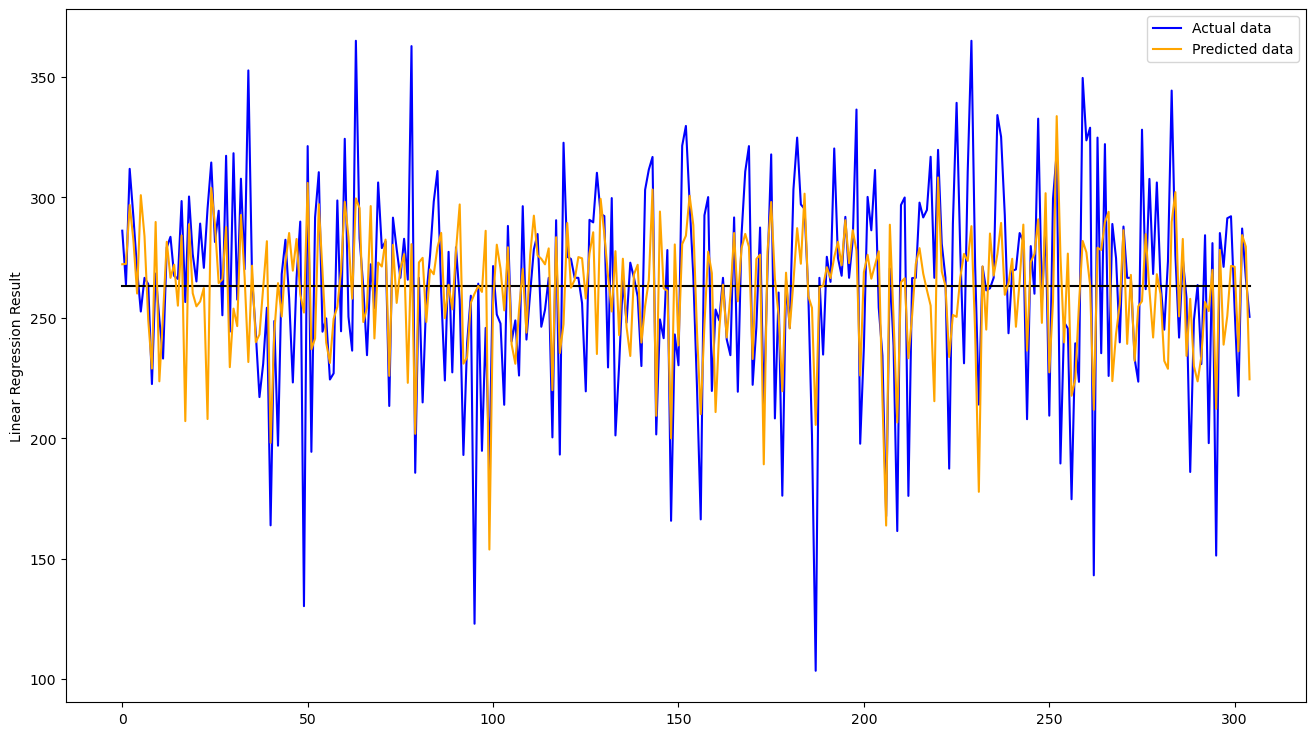

In [19]:
Axis = [y_val_inv[0].mean()] * len(y_val_inv[0])
plt.figure(figsize=(16, 9))
plt.ylabel('Linear Regression Result')
plt.plot(y_val_inv[0], 'blue', label='Actual data')
plt.plot(Axis, color="black")
plt.plot(lr_pred_inv[0], 'orange', label='Predicted data')
plt.legend()

# Support Vector Regression

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [20]:
#support vector regression model
from sklearn.svm import SVR

In [21]:
svr = SVR()

In [22]:
#training the model
svr_model = svr.fit(X_train,y_train) 
svr_pred = svr_model.predict(X_val)

## Evaluate

In [23]:
y_val_inv = scaler_single.inverse_transform(np.array(y_val).reshape(1, -1))
svr_pred_inv = scaler_single.inverse_transform(np.array(svr_pred).reshape(1, -1))

In [24]:
#evaluating the model with the following metrics
#mean squared error
svr_mse=mean_squared_error(svr_pred_inv[0], y_val_inv[0])     
#mean absolute error     
svr_mae=mean_absolute_error(svr_pred_inv[0], y_val_inv[0])  
#root mean squared error      
svr_rmse=np.sqrt(mean_squared_error(svr_pred_inv[0], y_val_inv[0]))
#r2 score
svr_r2 = r2_score(svr_pred_inv[0], y_val_inv[0])
print(f'mse: {svr_mse}')
print(f'mae: {svr_mae}')
print(f'rmse: {svr_rmse}')
print(f"R-Squared: {svr_r2}")

mse: 1748.9356964543879
mae: 31.832762392384065
rmse: 41.82027853152568
R-Squared: -275.20473274501944


In [25]:
svr_df =pd.DataFrame({"mse": svr_mse,"mae": svr_mae,"rmse": svr_rmse, "r2": svr_r2, "deviation": deviation_function(svr_pred_inv[0], y_val_inv[0])},index=['Support Vector Regression'])

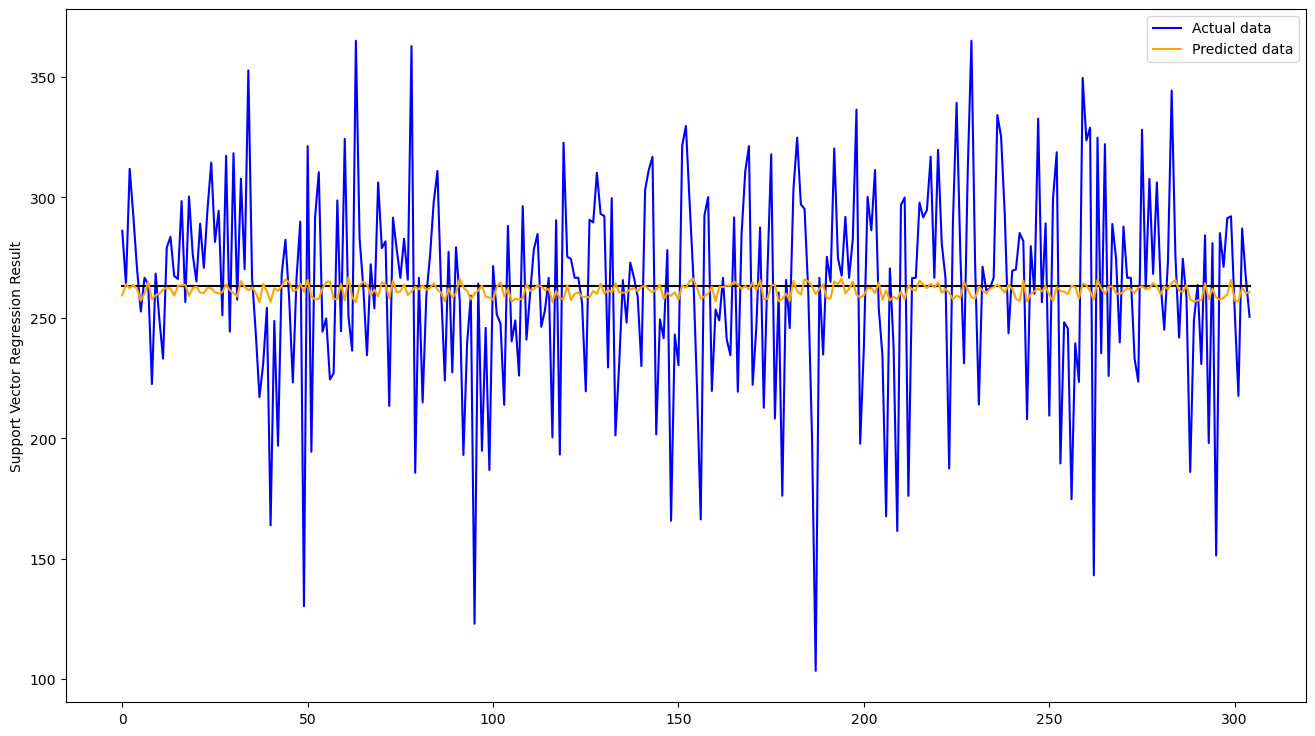

In [26]:
Axis = [y_val_inv[0].mean()] * len(y_val_inv[0])
plt.figure(figsize=(16, 9))
plt.ylabel('Support Vector Regression Result')
plt.plot(y_val_inv[0], 'blue', label='Actual data')
plt.plot(Axis, color="black")
plt.plot(svr_pred_inv[0], 'orange', label='Predicted data')
plt.legend()

# Decision Tree Regression

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [27]:
# decision tree regression model
from sklearn.tree import DecisionTreeRegressor             

In [28]:
dtr = DecisionTreeRegressor()

In [29]:
#training the model
dtr_model = dtr.fit(X_train,y_train) 
dtr_pred = dtr_model.predict(X_val)

## Evaluate

In [30]:
y_val_inv = scaler_single.inverse_transform(np.array(y_val).reshape(1, -1))
dtr_pred_inv = scaler_single.inverse_transform(np.array(dtr_pred).reshape(1, -1))

In [31]:
#evaluating the model with the following metrics
#mean squared error
dtr_mse=mean_squared_error(dtr_pred_inv[0], y_val_inv[0])     
#mean absolute error     
dtr_mae=mean_absolute_error(dtr_pred_inv[0], y_val_inv[0])  
#root mean squared error      
dtr_rmse=np.sqrt(mean_squared_error(dtr_pred_inv[0], y_val_inv[0]))
#r2 score
dtr_r2 = r2_score(dtr_pred_inv[0], y_val_inv[0])
print(f'mse: {dtr_mse}')
print(f'mae: {dtr_mae}')
print(f'rmse: {dtr_rmse}')
print(f"R-Squared: {dtr_r2}")


mse: 1835.8115432230381
mae: 31.440986986755767
rmse: 42.84637141255999
R-Squared: -0.0871918685138382


In [32]:
dtr_df =pd.DataFrame({"mse": dtr_mse,"mae": dtr_mae,"rmse": dtr_rmse, "r2": dtr_r2, "deviation": deviation_function(y_val_inv[0], dtr_pred_inv[0])},index=['Decision Tree Regression'])

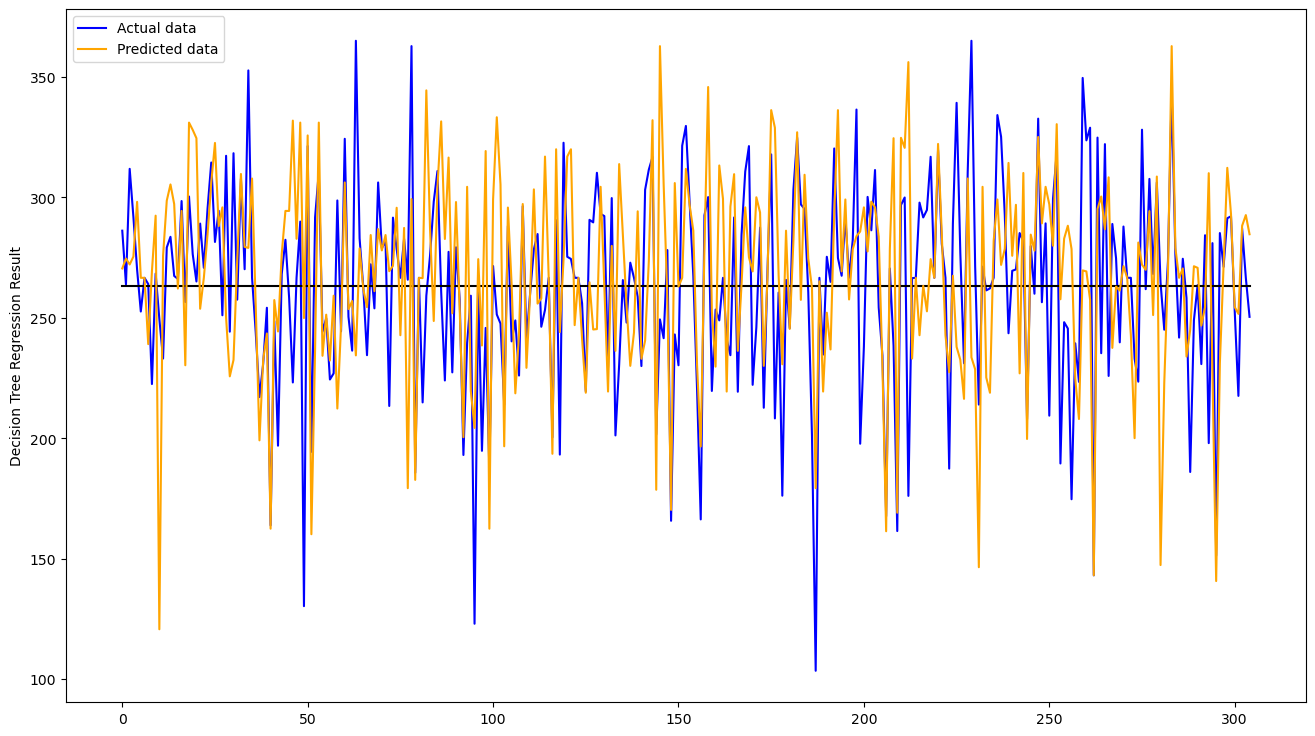

In [33]:
Axis = [y_val_inv[0].mean()] * len(y_val_inv[0])
plt.figure(figsize=(16, 9))
plt.ylabel('Decision Tree Regression Result')
plt.plot(y_val_inv[0], 'blue', label='Actual data')
plt.plot(Axis, color="black")
plt.plot(dtr_pred_inv[0], 'orange', label='Predicted data')
plt.legend()

# Random Forest Regression

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [34]:
# random forest regression model
from sklearn.ensemble import RandomForestRegressor             

In [35]:
rfr = RandomForestRegressor()

In [36]:
#training the model
rfr_model = rfr.fit(X_train,y_train) 
rfr_pred = rfr_model.predict(X_val)

## Evaluate

In [37]:
y_val_inv = scaler_single.inverse_transform(np.array(y_val).reshape(1, -1))
rfr_pred_inv = scaler_single.inverse_transform(np.array(rfr_pred).reshape(1, -1))

In [38]:
#evaluating the model with the following metrics
#mean squared error
rfr_mse=mean_squared_error(rfr_pred_inv[0], y_val_inv[0])     
#mean absolute error     
rfr_mae=mean_absolute_error(rfr_pred_inv[0], y_val_inv[0])  
#root mean squared error      
rfr_rmse=np.sqrt(mean_squared_error(rfr_pred_inv[0], y_val_inv[0]))
#r2 score
rfr_r2 = r2_score(rfr_pred_inv[0], y_val_inv[0])
print(f'mse: {rfr_mse}')
print(f'mae: {rfr_mae}')
print(f'rmse: {rfr_rmse}')
print(f"R-Squared: {rfr_r2}")


mse: 981.5367965794449
mae: 24.101789797377265
rmse: 31.32948765268026
R-Squared: -0.6012471802696728


In [39]:
rfr_df =pd.DataFrame({"mse": rfr_mse,"mae": rfr_mae,"rmse": rfr_rmse, "r2": rfr_r2, "deviation": deviation_function(rfr_pred_inv[0], y_val_inv[0])},index=['Random Forest Regression'])

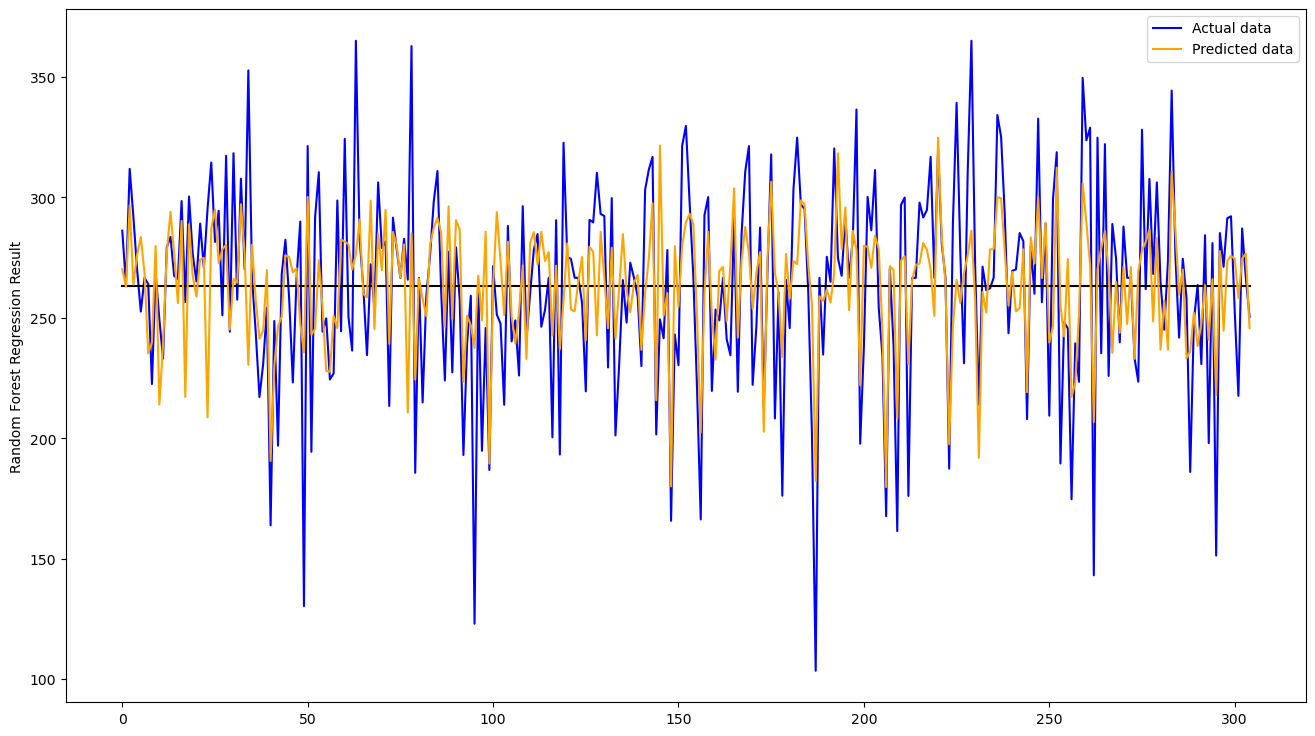

In [40]:
Axis = [y_val_inv[0].mean()] * len(y_val_inv[0])
plt.figure(figsize=(16, 9))
plt.ylabel('Random Forest Regression Result')
plt.plot(y_val_inv[0], 'blue', label='Actual data')
plt.plot(Axis, color="black")
plt.plot(rfr_pred_inv[0], 'orange', label='Predicted data')
plt.legend()


# XGBoost Regression

https://stackabuse.com/bytes/end-to-end-xgboost-regression-pipeline-with-scikit-learn/

In [41]:
# pip install xgboost

In [42]:
# xgboost model
from xgboost import XGBRegressor            

In [43]:
xgbr = XGBRegressor()

In [44]:
#training the model
xgbr_model = xgbr.fit(X_train,y_train) 
xgbr_pred = xgbr_model.predict(X_val)

## Evaluate

In [45]:
y_val_inv = scaler_single.inverse_transform(np.array(y_val).reshape(1, -1))
xgbr_pred_inv = scaler_single.inverse_transform(np.array(xgbr_pred).reshape(1, -1))

In [46]:
#evaluating the model with the following metrics
#mean squared error
xgbr_mse=mean_squared_error(xgbr_pred_inv[0], y_val_inv[0])     
#mean absolute error     
xgbr_mae=mean_absolute_error(xgbr_pred_inv[0], y_val_inv[0])  
#root mean squared error      
xgbr_rmse=np.sqrt(mean_squared_error(xgbr_pred_inv[0], y_val_inv[0]))
#r2 score
xgbr_r2 = r2_score(xgbr_pred_inv[0], y_val_inv[0])
print(f'mse: {xgbr_mse}')
print(f'mae: {xgbr_mae}')
print(f'rmse: {xgbr_rmse}')
print(f"R-Squared: {xgbr_r2}")

mse: 960.44931124454
mae: 23.75392358666643
rmse: 30.99111665049422
R-Squared: -0.04640998988378464


In [47]:
xgbr_df =pd.DataFrame({"mse": xgbr_mse,"mae": xgbr_mae,"rmse": xgbr_rmse,  "r2": xgbr_r2, "deviation": deviation_function(xgbr_pred_inv[0], y_val_inv[0])},index=['XGBoost Regression'])

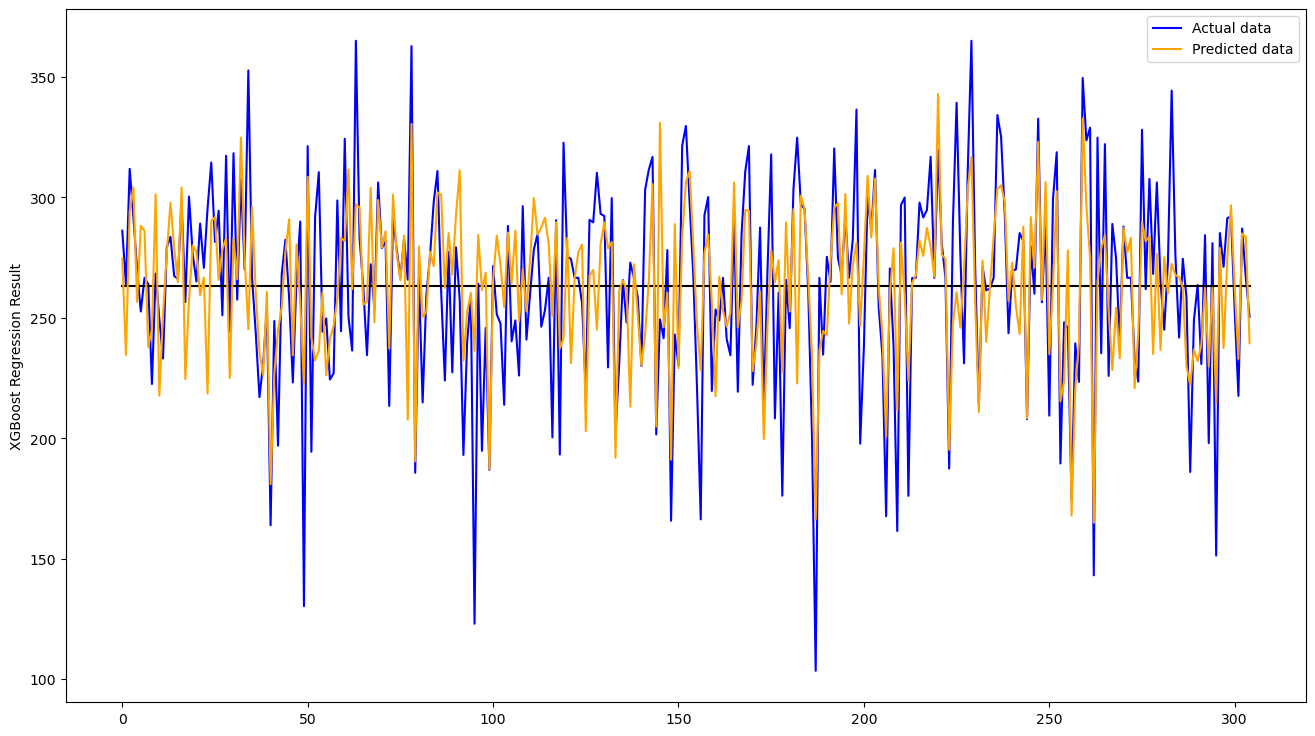

In [48]:
Axis = [y_val_inv[0].mean()] * len(y_val_inv[0])
plt.figure(figsize=(16, 9))
plt.ylabel('XGBoost Regression Result')
plt.plot(y_val_inv[0], 'blue', label='Actual data')
plt.plot(Axis, color="black")
plt.plot(xgbr_pred_inv[0], 'orange', label='Predicted data')
plt.legend()


# Comparision

https://stats.stackexchange.com/questions/183265/what-does-negative-r-squared-mean#:~:text=It%20means%20you've%20done,least%20squares%20regression%20line%20itself.

https://www.kaggle.com/questions-and-answers/267943

In [49]:
df_evaluation = pd.concat([lr_df, svr_df, dtr_df, rfr_df, xgbr_df]) 
df_evaluation

,mse,mae,rmse,r2,deviation
Linear Regression,1187.548194,26.299447,34.460821,-0.834144,0.103238
Support Vector Regression,1748.935696,31.832762,41.820279,-275.204733,0.121964
Decision Tree Regression,1835.811543,31.440987,42.846371,-0.087192,0.127314
Random Forest Regression,981.536797,24.101790,31.329488,-0.601247,0.094005
XGBoost Regression,960.449311,23.753924,30.991117,-0.046410,0.093049


In [50]:
df_evaluation.to_csv("G:/My Drive/DataMining/POC/LungCancer/local/Evaluation/Transform/basic.csv")

# Save Model

In [51]:
import pickle
lr_filename = 'G:/My Drive/DataMining/POC/LungCancer/local/Model/Transform/lr_Baseline.h5'
pickle.dump(lr_model, open(lr_filename, 'wb'))
svr_filename = 'G:/My Drive/DataMining/POC/LungCancer/local/Model/Transform/svr_Baseline.h5'
pickle.dump(svr_model, open(svr_filename, 'wb'))
rfr_filename = 'G:/My Drive/DataMining/POC/LungCancer/local/Model/Transform/rfr_Baseline.h5'
pickle.dump(rfr_model, open(rfr_filename, 'wb'))
dtr_filename = 'G:/My Drive/DataMining/POC/LungCancer/local/Model/Transform/dtr_Baseline.h5'
pickle.dump(dtr_model, open(dtr_filename, 'wb'))
xgbr_filename = 'G:/My Drive/DataMining/POC/LungCancer/local/Model/Transform/xgbr_Baseline.h5'
pickle.dump(xgbr_model, open(xgbr_filename, 'wb'))